# Homework 1 - Pietro Zeduri 
## Ex. 1 - Gaussian 
### FTCS method:

In [1]:
import numpy as np
import csv

# Define the name of the run

run_name = 'base' #'cf005' - 'J400'

# Define the domain
L = 10.0     # Domain length
nx = 201    # Number of grid points - Other used value is nx=401
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5     #Courant factor - Other used value is cf = 0.05
dt = cf*dx   #Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy() 

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)


nx= 201
dx= 0.05
dt= 0.025
Number of iterations= 800.0


In [2]:
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./images_FTCS_'+str(run_name))

os.listdir('./')

/Users/pietro/Documents/Uni/numrel/Homework_1/GAUSS


['.DS_Store',
 'L2_FTCS_100.png',
 'images_FTCS_base',
 'images_FTCS_400',
 'images_LW_500',
 'Untitled.ipynb',
 'L2_LW_100.png',
 'images_LW_100',
 'L2_FTCS_400.png',
 'images_LF_500',
 'Homework_1.ipynb',
 'L2_LW_500.png',
 'Gaussian.ipynb',
 'images_LP_500',
 'images_LP_100',
 'i_f_LP_500.png',
 'L2_FTCS_cf005.png',
 'images_FTCS_cf005',
 'L2_LF_100.png',
 'L2_LF_500.png',
 'images_LP_cf',
 'i_f_LP_cf.png',
 'i_f_FTCS_400.png',
 '.ipynb_checkpoints',
 'L2_LP_100.png',
 'L2_LF_cf.png',
 'images_FTCS_100',
 'L2_LP_cf.png',
 'i_f_LW_500.png',
 'L2_LP_500.png',
 'i_f_FTCS_cf005.png',
 'images_LF_cf']

In [3]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.grid(c='gray', alpha = 0.3)
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1.5,1.5)
plt.savefig('./images_FTCS_'+str(run_name)+'/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    u_next = u_current - dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(-1.5,1.5)
        plt.xlabel('x')
        plt.ylabel('u')
        plt.grid(c='gray', alpha = 0.3)
        plt.savefig('./images_FTCS_'+str(run_name)+'/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

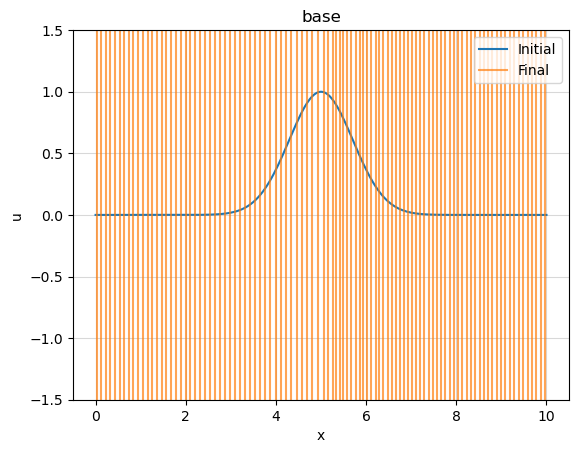

In [4]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final', alpha = 0.7)
plt.title(str(run_name))
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1.5,1.5)
plt.grid(color = 'gray', alpha = 0.3)
plt.legend()
#plt.show()
plt.savefig('i_f_FTCS_'+str(run_name)+'.png', dpi = 200)

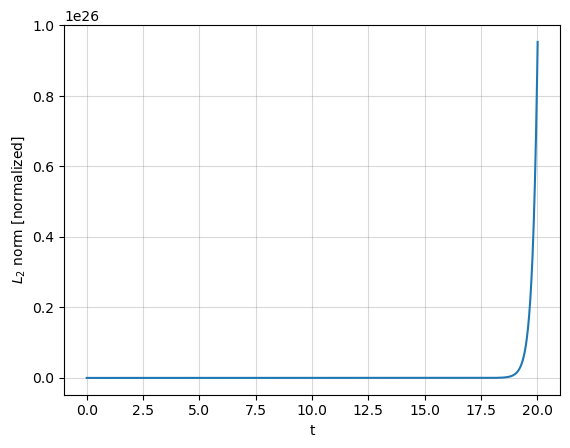

In [5]:
plt.plot(time,l2norm/l2norm[0])
plt.grid(c='gray', alpha = 0.3)
plt.xlabel('t')
plt.ylabel(r'$L_2$ norm [normalized]')
plt.savefig('L2_FTCS_'+str(run_name)+'.png', dpi = 200)
plt.show()

### Lax-Friedrichs method:

In [6]:
# Define the name of the run

run_name_LF = 'base' #'cf099' - 'J500'

# Define the domain
L = 10.0     # Domain length
nx = 201    # Number of grid points - Other used value is nx=401
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5     #Courant factor - Other used value is cf = 0.05
dt = cf*dx   #Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

# Define the initial condition
x0=5
u_initial_LF = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current_LF = u_initial_LF.copy()  #Use copy! if u don't u would get a pointer! not a new array!

#we create arrays where we will store the time and the l2norm
l2norm_LF=[]
l2norm_LF.append(np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF))) #we expect it to be a consant! 

time=[]
time.append(0.0)


nx= 201
dx= 0.05
dt= 0.025
Number of iterations= 800.0


In [7]:
#create directory where to save images
print(os.getcwd())

os.makedirs('./images_LF_'+str(run_name_LF))

os.listdir('./')

/Users/pietro/Documents/Uni/numrel/Homework_1/GAUSS


['images_LF_base',
 '.DS_Store',
 'L2_FTCS_100.png',
 'images_FTCS_base',
 'images_FTCS_400',
 'images_LW_500',
 'Untitled.ipynb',
 'L2_LW_100.png',
 'images_LW_100',
 'L2_FTCS_400.png',
 'images_LF_500',
 'Homework_1.ipynb',
 'L2_LW_500.png',
 'Gaussian.ipynb',
 'images_LP_500',
 'images_LP_100',
 'i_f_LP_500.png',
 'L2_FTCS_cf005.png',
 'images_FTCS_cf005',
 'L2_LF_100.png',
 'L2_LF_500.png',
 'images_LP_cf',
 'i_f_LP_cf.png',
 'i_f_FTCS_400.png',
 '.ipynb_checkpoints',
 'i_f_FTCS_base.png',
 'L2_LP_100.png',
 'L2_LF_cf.png',
 'images_FTCS_100',
 'L2_LP_cf.png',
 'i_f_LW_500.png',
 'L2_FTCS_base.png',
 'L2_LP_500.png',
 'i_f_FTCS_cf005.png',
 'images_LF_cf']

In [8]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current_LF)
plt.title('Time='+str(round(t,2)))
plt.grid(c='gray', alpha = 0.3)
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.savefig('./images_LF_'+str(run_name_LF)+'/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    u_next_LF = (np.roll(u_current_LF, 1) + np.roll(u_current_LF, -1))/2 - dt/(2*dx)*(np.roll(u_current_LF, -1) - np.roll(u_current_LF, 1))    
    
    # Update the solution
    u_current_LF = u_next_LF.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LF.append(np.sqrt(np.sum(u_current_LF**2)/len(u_current_LF)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%5==0):
        plt.plot(x, u_current_LF)
        plt.title('Time='+str(round(t,2)))
        plt.grid(c='gray', alpha = 0.3)
        plt.ylim(0,1.1)
        plt.xlabel('x')
        plt.ylabel('u')
        plt.savefig('./images_LF_'+str(run_name_LF)+'/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

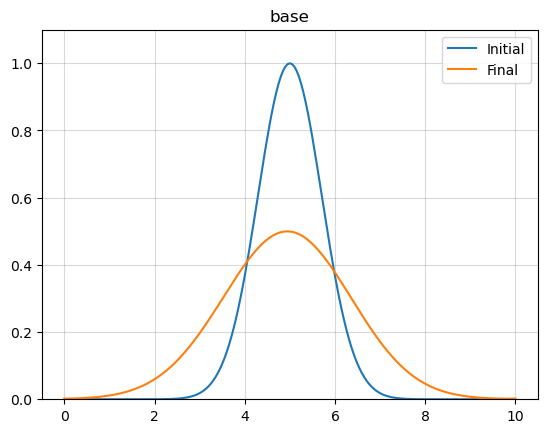

In [9]:
# Plot the final solution
plt.plot(x, u_initial_LF, label='Initial')
plt.plot(x, u_current_LF, label='Final')
plt.title(str(run_name_LF))
plt.ylim(0,1.1)
plt.legend()
plt.grid(color = 'gray',alpha = 0.3)
#plt.show()
plt.savefig('i_f_LF_'+str(run_name_LF)+'.png', dpi = 300)

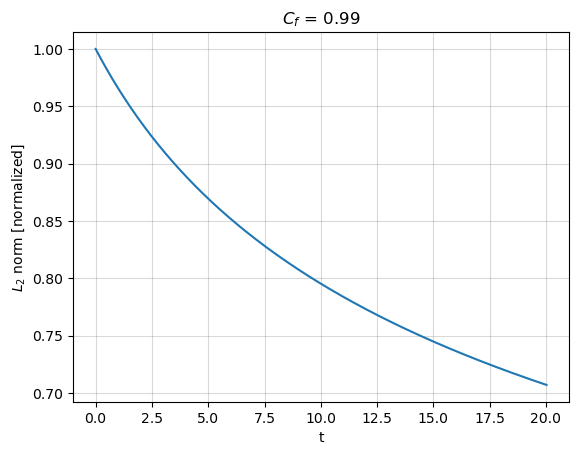

In [10]:
# Plot the L2 norm
plt.plot(time,l2norm_LF/l2norm_LF[0])
plt.grid(c='gray', alpha = 0.3)
plt.xlabel('t')
plt.title(r'$C_f$ = 0.99')
plt.ylabel(r'$L_2$ norm [normalized]')
plt.savefig('L2_LF_'+str(run_name_LF)+'.png', dpi = 200)
plt.show()
plt.show()

### Leapfrog method:

In [11]:
# Define the name of the run

run_name_LP = 'base' #'cf15' - 'J500'

# Define the domain
L = 10.0     # Domain length
nx = 201    # Number of grid points - Other used value is nx=401
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5     #Courant factor - Other used value is cf = 0.05
dt = cf*dx   #Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

# Define the initial condition
x0=5
u_initial_LP = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current_LP = u_initial_LP.copy()  #Use copy! if u don't u would get a pointer! not a new array!

#we create arrays where we will store the time and the l2norm
l2norm_LP=[]
l2norm_LP.append(np.sqrt(np.sum(u_current_LP**2)/len(u_current_LP))) #we expect it to be a consant! 

time=[]
time.append(0.0)


nx= 201
dx= 0.05
dt= 0.025
Number of iterations= 800.0


In [12]:
##create directory where to save images
print(os.getcwd())

os.makedirs('./images_LP_'+str(run_name_LP))

os.listdir('./')

/Users/pietro/Documents/Uni/numrel/Homework_1/GAUSS


['images_LF_base',
 '.DS_Store',
 'L2_FTCS_100.png',
 'images_FTCS_base',
 'images_FTCS_400',
 'images_LW_500',
 'Untitled.ipynb',
 'L2_LW_100.png',
 'images_LW_100',
 'L2_FTCS_400.png',
 'images_LF_500',
 'Homework_1.ipynb',
 'L2_LW_500.png',
 'Gaussian.ipynb',
 'images_LP_500',
 'images_LP_100',
 'i_f_LP_500.png',
 'L2_FTCS_cf005.png',
 'images_FTCS_cf005',
 'L2_LF_100.png',
 'L2_LF_500.png',
 'images_LP_cf',
 'i_f_LP_cf.png',
 'i_f_FTCS_400.png',
 '.ipynb_checkpoints',
 'i_f_FTCS_base.png',
 'L2_LP_100.png',
 'L2_LF_cf.png',
 'L2_LF_base.png',
 'images_FTCS_100',
 'L2_LP_cf.png',
 'images_LP_base',
 'i_f_LW_500.png',
 'i_f_LF_base.png',
 'L2_FTCS_base.png',
 'L2_LP_500.png',
 'i_f_FTCS_cf005.png',
 'images_LF_cf']

In [13]:
# Initilize time and iteration counter
t = 0.0
i = 1

#save the initial conditions
plt.plot(x, u_current_LP)
plt.title('Time='+str(round(t,2)))
plt.grid(c='gray', alpha = 0.3)
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-0.1,1.1)
plt.savefig('./images_LP_'+str(run_name_LP)+'/fig_'+str(0).zfill(5)+'.png', dpi=200)
plt.close()

#When running the simulation with cf = 1.5, to avoid the system diverging at the first step
#we run the Lax-Friedrichs step with cf < 1 and re-set it later. 
#cf = 0.5

#Compute the first step with Lax-Friedrichs:
u_next_LP = (np.roll(u_current_LP, 1) + np.roll(u_current_LP, -1))/2 - dt/(2*dx)*(np.roll(u_current_LP, -1) - np.roll(u_current_LP, 1))
u_current_LP= u_next_LP.copy()
    
l2norm_LP.append(np.sqrt(np.sum(u_current_LP**2)/len(u_current_LP)))

t=+dt
time.append(t)

#Re-set cf = 1.5: 
#cf = 1.5  #Courant factor
#dt = cf*dx   #Time step

#solve the advection equation
while t < t_final:
    # Compute the new solution using the LEAPFROG method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions, it shifts the array all to the right or to the left
    u_next_LP = (u_initial_LP) - dt/(dx)*(np.roll(u_current_LP, -1) - np.roll(u_current_LP, 1))    
    
    # Update the solution
    u_initial_LP = u_current_LP.copy()
    u_current_LP = u_next_LP.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LP.append(np.sqrt(np.sum(u_current_LP**2)/len(u_current_LP)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%5==0):
        plt.plot(x, u_current_LP)
        plt.title('Time='+str(round(t,2)))
        plt.grid(c='gray', alpha = 0.3)
        plt.xlabel('x')
        plt.ylabel('u')
        plt.ylim(-0.1,1.1)
        plt.savefig('./images_LP_'+str(run_name_LP)+'/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

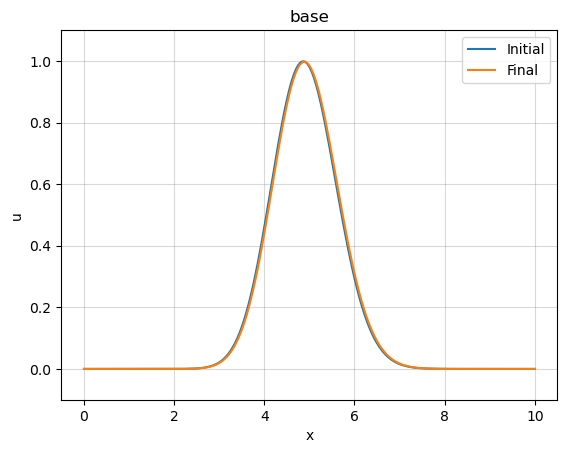

In [14]:
# Plot the final solution
plt.plot(x, u_initial_LP, label='Initial')
plt.plot(x, u_current_LP, label='Final')
plt.title(str(run_name_LP))
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-0.1,1.1)
plt.legend()
plt.grid(color = 'gray',alpha = 0.3)
#plt.show()
plt.savefig('i_f_LP_'+str(run_name_LP)+'.png', dpi = 300)

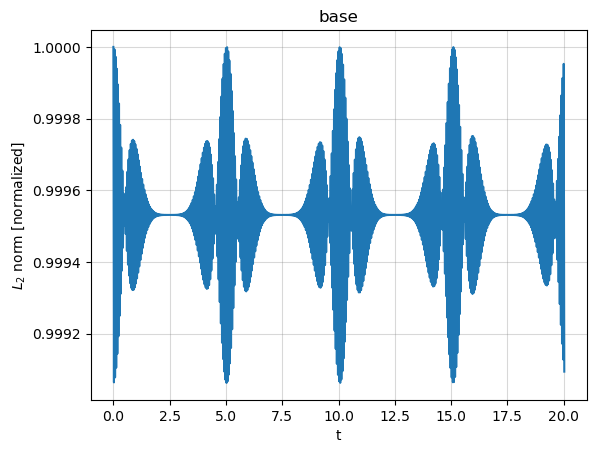

In [15]:
# Plot the L2 norm
plt.plot(time,l2norm_LP/l2norm_LP[0])
plt.grid(c='gray', alpha = 0.3)
plt.xlabel('t')
plt.ylabel(r'$L_2$ norm [normalized]')
plt.title(str(run_name_LP))
plt.savefig('L2_LP_'+str(run_name_LP)+'.png', dpi = 300)

### Lax-Wendroff scheme:

In [16]:
# Define the name of the run

run_name_LW = 'base' #'J500'

# Define the domain
L = 10.0     # Domain length
nx = 201    # Number of grid points - Other used value is nx=401
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5     #Courant factor - Other used value is cf = 0.05
dt = cf*dx   #Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

# Define the initial condition
x0=5
u_initial_LW = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current_LW = u_initial_LW.copy() 

#we create arrays where we will store the time and the l2norm
l2norm_LW=[]
l2norm_LW.append(np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW))) #We expect it to be a consant! 

time=[]
time.append(0.0)


nx= 201
dx= 0.05
dt= 0.025
Number of iterations= 800.0


In [17]:
##create directory where to save images
print(os.getcwd())

os.makedirs('./images_LW_'+str(run_name_LW))

os.listdir('./')

/Users/pietro/Documents/Uni/numrel/Homework_1/GAUSS


['images_LF_base',
 '.DS_Store',
 'L2_FTCS_100.png',
 'images_FTCS_base',
 'images_FTCS_400',
 'images_LW_500',
 'Untitled.ipynb',
 'L2_LW_100.png',
 'images_LW_100',
 'L2_FTCS_400.png',
 'images_LF_500',
 'Homework_1.ipynb',
 'L2_LW_500.png',
 'Gaussian.ipynb',
 'images_LP_500',
 'images_LP_100',
 'i_f_LP_500.png',
 'L2_FTCS_cf005.png',
 'i_f_LP_base.png',
 'L2_LP_base.png',
 'images_FTCS_cf005',
 'images_LW_base',
 'L2_LF_100.png',
 'L2_LF_500.png',
 'images_LP_cf',
 'i_f_LP_cf.png',
 'i_f_FTCS_400.png',
 '.ipynb_checkpoints',
 'i_f_FTCS_base.png',
 'L2_LP_100.png',
 'L2_LF_cf.png',
 'L2_LF_base.png',
 'images_FTCS_100',
 'L2_LP_cf.png',
 'images_LP_base',
 'i_f_LW_500.png',
 'i_f_LF_base.png',
 'L2_FTCS_base.png',
 'L2_LP_500.png',
 'i_f_FTCS_cf005.png',
 'images_LF_cf']

In [18]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current_LW)
plt.title('Time='+str(round(t,2)))
plt.grid(c='gray', alpha=0.3)
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-0.1,1.1)
plt.savefig('./images_LW_'+str(run_name_LW)+'/fig_'+str(0).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    u_next_LW = u_current_LW - dt/(2*dx)*(np.roll(u_current_LW, -1) - np.roll(u_current_LW, 1)) + (dt**2)/(2*dx**2)*(np.roll(u_current_LW, -1)-2*u_current_LW+np.roll(u_current_LW, 1))
    
    # Update the solution
    u_current_LW = u_next_LW.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LW.append(np.sqrt(np.sum(u_current_LW**2)/len(u_current_LW)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%5==0):
        plt.plot(x, u_current_LW)
        plt.title('Time='+str(round(t,2)))
        plt.grid(c='gray', alpha=0.3)
        plt.xlabel('x')
        plt.ylabel('u')
        plt.ylim(-0.1,1.1)
        plt.savefig('./images_LW_'+str(run_name_LW)+'/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

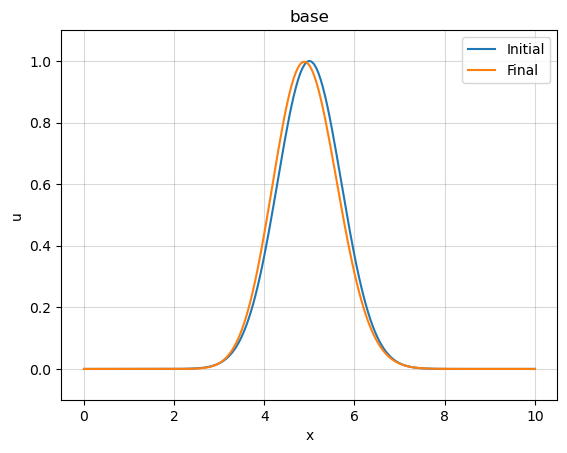

In [19]:
# Plot the final solution
plt.plot(x, u_initial_LW, label='Initial')
plt.plot(x, u_current_LW, label='Final')
plt.title(str(run_name_LW))
plt.grid(c='gray', alpha=0.3)
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-0.1,1.1)
plt.legend()
plt.grid(color = 'gray',alpha = 0.3)
#plt.show()
plt.savefig('i_f_LW_'+str(run_name_LW)+'.png', dpi = 300)

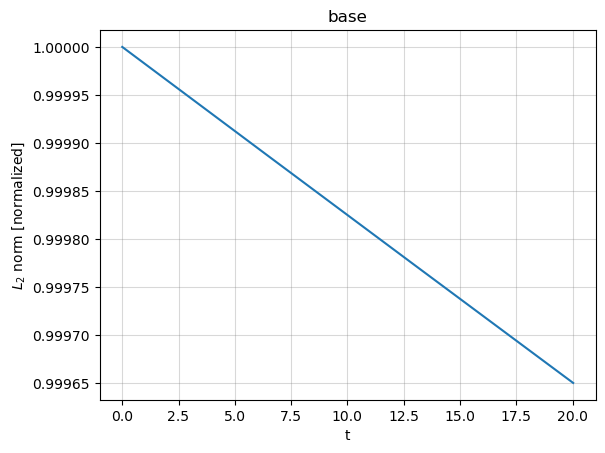

In [20]:
#Plot the L2 norm
plt.plot(time,l2norm_LW/l2norm_LW[0])
plt.grid(c='gray', alpha=0.3)
plt.xlabel('t')
plt.ylabel(r'$L_2$ norm [normalized]')
#plt.ylim(-0.1,1.1)
plt.title(str(run_name_LW))
plt.savefig('L2_LW_'+str(run_name_LW)+'.png', dpi = 200)
plt.show()